In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

클래스 레이블: [0 1 2]


In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [3]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

C:\Users\JSWonner\AppData\Local\Temp/ipykernel_9528/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


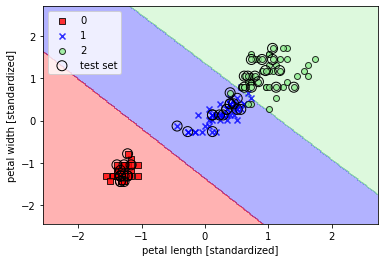

In [4]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

In [5]:
svm.dual_coef_

array([[ 0.88134491,  0.60379849, -1.        , -0.        , -0.        ,
        -0.        , -0.        , -0.4851434 , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.39455455],
       [ 0.39455455,  0.        ,  0.        ,  1.        ,  0.19375927,
         1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -0.19375927, -1.        ,
        -1.        ]])

In [6]:
svm.support_vectors_

array([[-1.05383474, -1.04507821],
       [-1.16537974, -0.91397521],
       [-0.27301968, -0.2584602 ],
       [ 0.39625036,  0.3970548 ],
       [ 0.50779537,  0.2659518 ],
       [ 0.61934037,  0.3970548 ],
       [ 0.50779537,  0.3970548 ],
       [-0.16147468, -0.2584602 ],
       [ 0.61934037,  0.3970548 ],
       [ 0.39625036,  0.5281578 ],
       [ 0.56356787,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.3970548 ],
       [ 0.73088538,  0.5281578 ],
       [ 0.67511288,  0.65926081],
       [ 1.12129291,  0.5281578 ],
       [ 0.73088538,  0.92146681],
       [ 0.56356787,  0.79036381],
       [ 1.0097479 ,  0.2659518 ],
       [ 0.67511288,  0.92146681],
       [ 0.56356787,  0.79036381],
       [ 0.61934037,  0.79036381],
       [ 0.73088538,  0.3970548 ],
       [ 0.9539754 ,  0.79036381],
       [ 0.73088538,  0.92146681],
       [ 0.67511288,  0.3970548 ]])

In [7]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)

In [8]:
y_xor = np.where(y_xor,1,-1)

In [9]:
X_xor
y_xor

array([ 1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1])

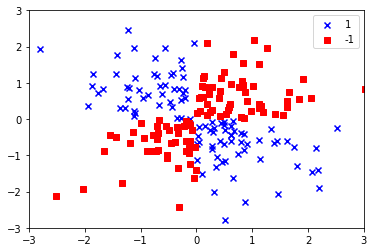

In [10]:
plt.scatter(X_xor[y_xor ==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor == -1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='upper right')
plt.tight_layout
plt.show()


C:\Users\JSWonner\AppData\Local\Temp/ipykernel_9528/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


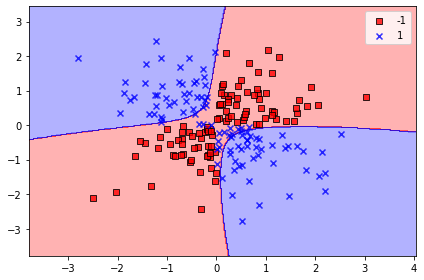

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=1, gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\JSWonner\AppData\Local\Temp/ipykernel_9528/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


<function matplotlib.pyplot.show(close=None, block=None)>

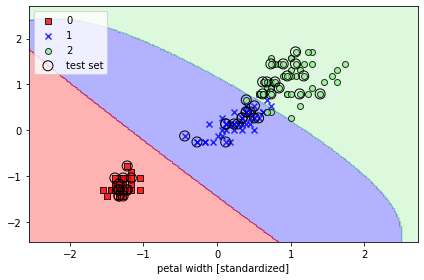

In [15]:
svm=SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show

C:\Users\JSWonner\AppData\Local\Temp/ipykernel_9528/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


<function matplotlib.pyplot.show(close=None, block=None)>

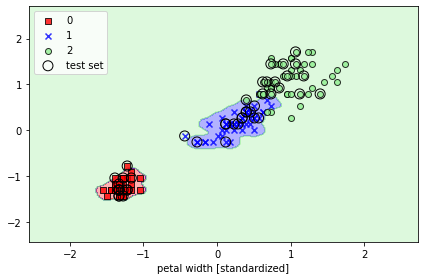

In [16]:
svm=SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show